<a href="https://colab.research.google.com/github/valmyr/ConvNetVerilog/blob/main/VerifHandwrittenDigitClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Block 1 - Imports




In [1]:
try:
  from numpy import mean
  from numpy import std
  from matplotlib import pyplot
  from sklearn.model_selection import KFold
  from keras.datasets import mnist
  from keras.utils import to_categorical
  from keras.models import Sequential
  from keras.layers import Conv2D
  from keras.layers import MaxPooling2D
  from keras.layers import Dense
  from keras.layers import Flatten
  from keras.optimizers import SGD
except:
  !pip install keras
  !pip install tensorflow
  from numpy import mean
  from numpy import std
  from matplotlib import pyplot
  from sklearn.model_selection import KFold
  from keras.datasets import mnist
  from keras.utils import to_categorical
  from keras.models import Sequential
  from keras.layers import Conv2D
  from keras.layers import MaxPooling2D
  from keras.layers import Dense
  from keras.layers import Flatten
  from keras.optimizers import SGD
from matplotlib import pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 81.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 103.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 77.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 118.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 6.4 MB/s eta 0:00:00


# Block 2 - Load data from MNIST dataset


In [2]:
!python3 --version

Python 3.11.13


In [3]:
!python3 --version

Python 3.11.13


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


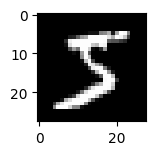

In [4]:
(trainX, trainY), (testX, testY) = mnist.load_data()
print('Train: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Test: X=%s, y=%s' % (testX.shape, testY.shape))
i=0
pyplot.subplot(330 + 1 + i)
pyplot.imshow(trainX[0], cmap=pyplot.get_cmap('gray'))
pyplot.show()

# Block 3 - Pre-processing


In [5]:

# reshape dataset to have a single channel
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

# one hot encode target values - since output is vector of 10 values
trainY = to_categorical(trainY)
testY = to_categorical(testY)

print('Train: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Test: X=%s, y=%s' % (testX.shape, testY.shape))

# convert from integers to floats
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')

# normalize to range 0-1
trainX = train_norm / 255.0
testX = test_norm / 255.0

Train: X=(60000, 28, 28, 1), y=(60000, 10)
Test: X=(10000, 28, 28, 1), y=(10000, 10)


# Block 4 - Model Definition


In [6]:
# def define_model():
#   model = Sequential()
#   # Convolution layer with 32 kernels of [3*3]
#   model.add(Conv2D(2, (5, 5), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
#   # Max Pooling with [2*2]
#   model.add(MaxPooling2D((2, 2)))
#   model.add(Conv2D(4, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
#   model.add(MaxPooling2D((2, 2)))
#   model.add(Flatten())
#   # First layer of Fully connected layer with 100 nodes
# #   model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
#   # Output layer with 10 nodes
#   model.add(Dense(10, activation='sigmoid',    kernel_initializer='he_uniform'))

#   # compile model
# #   opt = SGD(lr=0.01, momentum=0.9)
#   model.compile( loss='categorical_crossentropy', metrics=['accuracy'])

#   return model
# define_model().summary()

# Block 5 - Model Evaluation


In [7]:
# scores, histories = list(), list()

# # 2 fold cross validation
# kfold = KFold(2, shuffle=True, random_state=1)

# # enumerate splits
# for train_ix, test_ix in kfold.split(trainX):
# 	model = define_model()
# 	# select rows for train and test
# 	trainX_temp, trainY_temp, testX_temp, testY_temp = trainX[train_ix], trainY[train_ix], trainX[test_ix], trainY[test_ix]
# 	# fit model
# 	history = model.fit(trainX_temp, trainY_temp, epochs=5, batch_size=32, validation_data=(testX_temp, testY_temp), verbose=1)
# 	# evaluate model
# 	_, acc = model.evaluate(testX_temp, testY_temp, verbose=0)
# 	print('> %.3f' % (acc * 100.0))
# 	# stores scores
# 	scores.append(acc)
# 	# break
# 	histories.append(history)
# 	break

# Block 6 - Plot learning curves


In [8]:
import tensorflow as tf

In [9]:
model= tf.keras.models.load_model("/content/output00.h5")

In [10]:
# !pip install keras_preprocessing

In [11]:
# import

In [12]:
img_tensor= testX[0:1].shape

In [13]:
model.layers

[<Conv2D name=conv2d_6, built=True>,
 <MaxPooling2D name=max_pooling2d_6, built=True>,
 <Conv2D name=conv2d_7, built=True>,
 <MaxPooling2D name=max_pooling2d_7, built=True>,
 <Flatten name=flatten_3, built=True>,
 <Dense name=dense_3, built=True>]

In [14]:
from keras import models


# Outputs of the 8 layers, which include conv2D and max pooling layers
layer_outputs = [layer.output for layer in model.layers[:8]]
layer_outputs

[<KerasTensor shape=(None, 24, 24, 2), dtype=float32, sparse=False, name=keras_tensor>,
 <KerasTensor shape=(None, 12, 12, 2), dtype=float32, sparse=False, name=keras_tensor_2>,
 <KerasTensor shape=(None, 10, 10, 4), dtype=float32, sparse=False, name=keras_tensor_5>,
 <KerasTensor shape=(None, 5, 5, 4), dtype=float32, sparse=False, name=keras_tensor_9>,
 <KerasTensor shape=(None, 100), dtype=float32, sparse=False, name=keras_tensor_14>,
 <KerasTensor shape=(None, 10), dtype=float32, sparse=False, name=keras_tensor_20>]

In [15]:
img_tensor = testX[3:4]*(2**8-1)

In [37]:
img_tensor;

In [17]:
model.save("10_05_2025_DigitClassif.h5")

In [18]:
import numpy as np

In [19]:
nbits=1

In [20]:
# img_tensor = testX[0:1]
# img_tensor.shape
cmp = 'viridis'

In [21]:
# img_tensor = a.reshape(1,28,28,1)

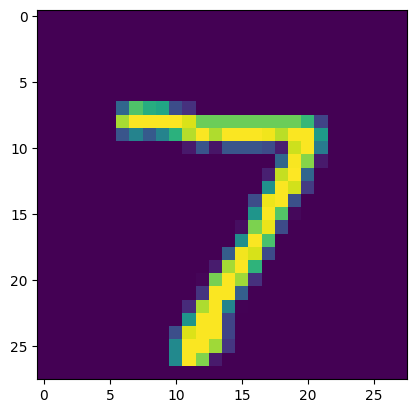

In [22]:
img_tensor = testX[0:1]*2**8
plt.imshow(img_tensor.reshape(28,28))

In [24]:
from matplotlib import pyplot as plt

In [25]:
# plt.imshow(img_tensor.reshape(28,28), cmap ='viridis')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
(1, 24, 24, 2)


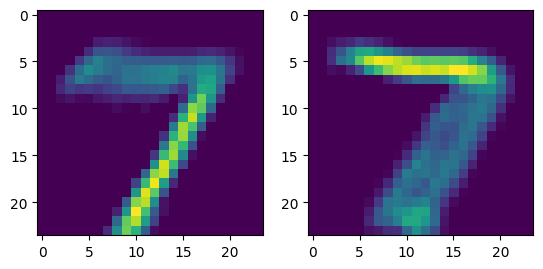

In [26]:
from keras import models


# Outputs of the 8 layers, which include conv2D and max pooling layers
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(model.layers[0].input, outputs = layer_outputs)
activations = activation_model.predict(img_tensor)

# Getting Activations of first layer
first_layer_activation = activations[0]

# shape of first layer activation
print(first_layer_activation.shape)

# 6th channel of the image after first layer of convolution is applied
plt.subplot(1,2,1)
plt.imshow(first_layer_activation[0, :, :, 0], cmap =cmp)
plt.subplot(1,2,2)
plt.imshow(first_layer_activation[0, :, :, 1], cmap =cmp)

# 15th channel of the image after first layer of convolution is applied
# plt.matshow(first_layer_activation[0, :, :, 1], cmap ='viridis')

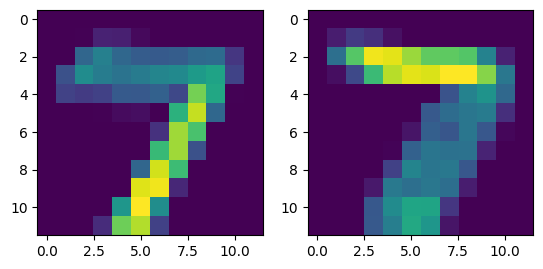

In [27]:
first_layer_activation = activations[1]
plt.subplot(1,2,1)
plt.imshow(first_layer_activation[0, :, :, 0], cmap =cmp)
plt.subplot(1,2,2)
plt.imshow(first_layer_activation[0, :, :, 1], cmap =cmp)
# plt.subplot(1,4,3)
# plt.imshow(first_layer_activation[0, :, :, 2], cmap ='viridis')

In [28]:
first_layer_activation[0, :, :, 1].astype(int)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,  71, 148, 120,  41,   1,   0,   0,   0,   0,   0,   0],
       [  0, 324, 651, 864, 848, 751, 668, 664, 646, 390,  85,   0],
       [  0,  33, 194, 602, 788, 846, 835, 881, 883, 723, 349,   0],
       [  0,   0,   0,   0,   0,   0,   0, 227, 392, 454, 300,   0],
       [  0,   0,   0,   0,   0,   0, 247, 312, 347, 368, 119,   0],
       [  0,   0,   0,   0,   0,  49, 266, 236, 345, 240,  14,   0],
       [  0,   0,   0,   0,   6, 275, 345, 328, 332,  89,   0,   0],
       [  0,   0,   0,   0, 172, 398, 343, 355, 241,   0,   0,   0],
       [  0,   0,   0,  60, 355, 322, 349, 319,  71,   0,   0,   0],
       [  0,   0,   0, 242, 425, 519, 515, 138,   0,   0,   0,   0],
       [  0,   0,   0, 247, 377, 534, 463,  51,   0,   0,   0,   0]])

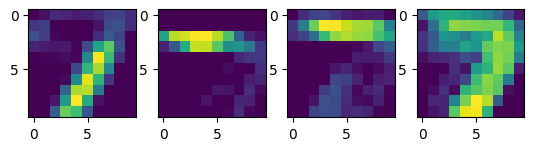

In [29]:
first_layer_activation = activations[2]
plt.subplot(1,4,1)
plt.imshow(first_layer_activation[0, :, :, 0], cmap =cmp)
plt.subplot(1,4,2)
plt.imshow(first_layer_activation[0, :, :, 1], cmap =cmp)
plt.subplot(1,4,3)
plt.imshow(first_layer_activation[0, :, :, 2], cmap =cmp)
plt.subplot(1,4,4)
plt.imshow(first_layer_activation[0, :, :, 3], cmap =cmp)

In [30]:
first_layer_activation[0, :, :, 0]

array([[0.00000000e+00, 8.40327988e+01, 2.28884979e+02, 2.06130219e+02,
        1.46477219e+02, 1.64675629e+02, 2.34237717e+02, 3.56875977e+02,
        3.81862396e+02, 2.44349396e+02],
       [2.92765320e+02, 3.51399628e+02, 9.09752274e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.01824234e+02, 4.31985229e+02,
        4.64881775e+02, 2.41330582e+02],
       [4.69365936e+02, 3.44213562e+02, 3.54790955e+01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 2.36297470e+02, 5.32905823e+02,
        3.80525909e+02, 1.85636306e+00],
       [1.83294342e+02, 1.54253525e+02, 1.21015762e+02, 1.37312515e+02,
        2.82435741e+01, 4.43296722e+02, 1.11654700e+03, 1.41482654e+03,
        4.89215393e+02, 0.00000000e+00],
       [0.00000000e+00, 3.43306198e+01, 2.93641262e+01, 5.15932121e+01,
        3.06708126e+01, 8.81956116e+02, 1.86469019e+03, 1.27278955e+03,
        2.79817383e+02, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
   

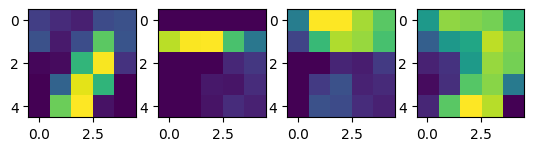

In [31]:
first_layer_activation = activations[3]
plt.subplot(1,4,1)
plt.imshow(first_layer_activation[0, :, :, 0], cmap =cmp)
plt.subplot(1,4,2)
plt.imshow(first_layer_activation[0, :, :, 1], cmap =cmp)
plt.subplot(1,4,3)
plt.imshow(first_layer_activation[0, :, :, 2], cmap =cmp)
plt.subplot(1,4,4)
plt.imshow(first_layer_activation[0, :, :, 3], cmap =cmp)

In [32]:
first_layer_activation[0, :, :, 0]

array([[3.5139963e+02, 2.2888498e+02, 1.6467563e+02, 4.3198523e+02,
        4.6488177e+02],
       [4.6936594e+02, 1.3731252e+02, 4.4329672e+02, 1.4148265e+03,
        4.8921539e+02],
       [3.4330620e+01, 5.1593212e+01, 1.2413091e+03, 1.8646902e+03,
        2.7981738e+02],
       [0.0000000e+00, 6.0288446e+02, 1.8109021e+03, 1.2335515e+03,
        1.8399467e+00],
       [0.0000000e+00, 1.4605756e+03, 1.8867511e+03, 9.5578545e+01,
        1.4259485e+00]], dtype=float32)

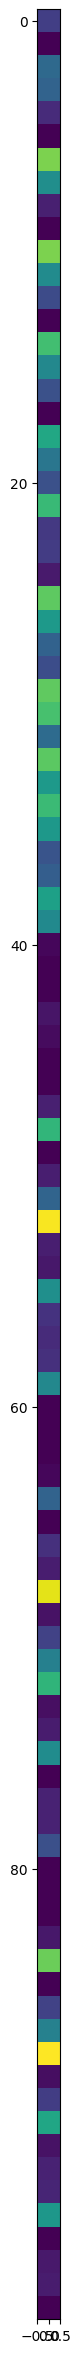

In [33]:
first_layer_activation = activations[4].T
# plt.subplot(1,4,4)
plt.figure(figsize=(40,30))
plt.imshow(first_layer_activation, cmap =cmp)

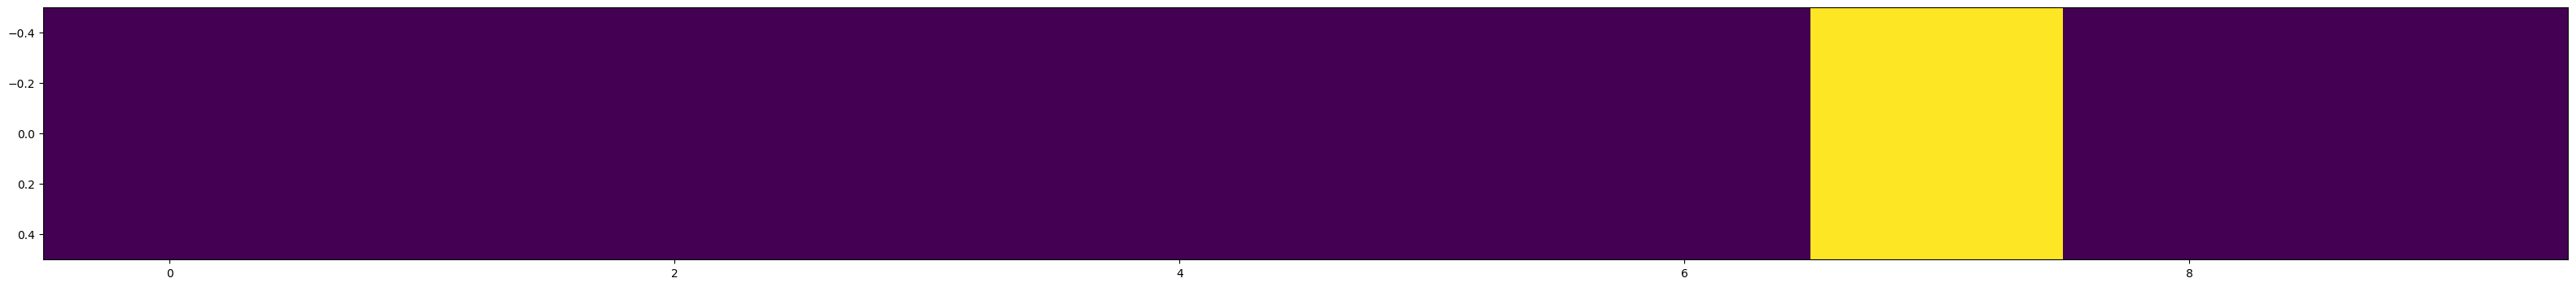

In [35]:
first_layer_activation = activations[5]
# plt.subplot(1,4,4)
plt.figure(figsize=(40,30))
plt.imshow(first_layer_activation, cmap =cmp)

In [36]:
first_layer_activation

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)